In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | sibolga
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | basco
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | nishihara
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | jizan
Processing Record 16 of Set 1 | pochutla
Processing Record 17 of Set 1 | calabozo
Processing Record 18 of Set 1 | phan thiet
Processing Record 19 of Set 1 | tougan
Processing Record 20 of Set 1 | a
City not found. Skipping...
Processing Record 21 of Set 1 | komsomolskiy
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | saint-denis
Processi

Processing Record 37 of Set 4 | korla
Processing Record 38 of Set 4 | batagay
Processing Record 39 of Set 4 | prince rupert
Processing Record 40 of Set 4 | atbasar
Processing Record 41 of Set 4 | nanortalik
Processing Record 42 of Set 4 | pershotravneve
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | pacific grove
Processing Record 45 of Set 4 | porto velho
Processing Record 46 of Set 4 | sitka
Processing Record 47 of Set 4 | upernavik
Processing Record 48 of Set 4 | christchurch
Processing Record 49 of Set 4 | laguna
Processing Record 50 of Set 4 | dzilam gonzalez
Processing Record 1 of Set 5 | alpena
Processing Record 2 of Set 5 | fairbanks
Processing Record 3 of Set 5 | esso
Processing Record 4 of Set 5 | yenagoa
Processing Record 5 of Set 5 | storforshei
Processing Record 6 of Set 5 | roma
Processing Record 7 of Set 5 | iskateley
Processing Record 8 of Set 5 | borovskoy
Processing Record 9 of Set 5 | kikwit
Processing Record 10 of Set 5 | gao
Processi

Processing Record 31 of Set 8 | sinnai
Processing Record 32 of Set 8 | leirvik
Processing Record 33 of Set 8 | hede
Processing Record 34 of Set 8 | mumford
Processing Record 35 of Set 8 | tumen
Processing Record 36 of Set 8 | beterou
Processing Record 37 of Set 8 | vestmannaeyjar
Processing Record 38 of Set 8 | norman wells
Processing Record 39 of Set 8 | dawlatabad
Processing Record 40 of Set 8 | irmo
Processing Record 41 of Set 8 | portland
Processing Record 42 of Set 8 | touros
Processing Record 43 of Set 8 | sorland
Processing Record 44 of Set 8 | shimoda
Processing Record 45 of Set 8 | chokurdakh
Processing Record 46 of Set 8 | codrington
Processing Record 47 of Set 8 | finnsnes
Processing Record 48 of Set 8 | hovd
Processing Record 49 of Set 8 | ondangwa
Processing Record 50 of Set 8 | arlit
Processing Record 1 of Set 9 | tiarei
Processing Record 2 of Set 9 | yekaterinoslavka
Processing Record 3 of Set 9 | guerrero negro
Processing Record 4 of Set 9 | eshowe
Processing Record 5 o

Processing Record 20 of Set 12 | avera
Processing Record 21 of Set 12 | westport
Processing Record 22 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 23 of Set 12 | madison
Processing Record 24 of Set 12 | baculin
Processing Record 25 of Set 12 | cheremkhovo
Processing Record 26 of Set 12 | pingliang
Processing Record 27 of Set 12 | sao borja
Processing Record 28 of Set 12 | bahia blanca
Processing Record 29 of Set 12 | garowe
Processing Record 30 of Set 12 | songea
Processing Record 31 of Set 12 | molteno
Processing Record 32 of Set 12 | san isidro
Processing Record 33 of Set 12 | mulino
Processing Record 34 of Set 12 | narrabri
Processing Record 35 of Set 12 | irbeyskoye
Processing Record 36 of Set 12 | sijunjung
Processing Record 37 of Set 12 | keelung
Processing Record 38 of Set 12 | birjand
Processing Record 39 of Set 12 | lososina
Processing Record 40 of Set 12 | blackfoot
Processing Record 41 of Set 12 | alikalia
Processing Record 42 of Set 12 | tokur
Proces

In [9]:
len(city_data)

547

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sibolga,1.74,98.78,78.19,81,100,2.86,ID,2020-08-01 00:58:47
1,Bredasdorp,-34.53,20.04,42.80,93,0,1.12,ZA,2020-08-01 00:58:47
2,Tuktoyaktuk,69.45,-133.04,59.00,82,40,13.87,CA,2020-08-01 00:58:47
3,Bluff,-46.60,168.33,52.00,84,100,1.19,NZ,2020-08-01 00:58:47
4,Ushuaia,-54.80,-68.30,41.00,56,40,16.11,AR,2020-08-01 00:55:18
5,Busselton,-33.65,115.33,52.00,90,95,5.06,AU,2020-08-01 00:58:48
6,Esperance,-33.87,121.90,51.80,100,40,3.36,AU,2020-08-01 00:58:48
7,Basco,20.45,121.97,84.31,80,100,15.30,PH,2020-08-01 00:58:48
8,Punta Arenas,-53.15,-70.92,37.40,93,100,19.46,CL,2020-08-01 00:54:49
9,Nishihara,26.18,127.76,89.60,79,40,12.75,JP,2020-08-01 00:58:48


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sibolga,ID,2020-08-01 00:58:47,1.74,98.78,78.19,81,100,2.86
1,Bredasdorp,ZA,2020-08-01 00:58:47,-34.53,20.04,42.80,93,0,1.12
2,Tuktoyaktuk,CA,2020-08-01 00:58:47,69.45,-133.04,59.00,82,40,13.87
3,Bluff,NZ,2020-08-01 00:58:47,-46.60,168.33,52.00,84,100,1.19
4,Ushuaia,AR,2020-08-01 00:55:18,-54.80,-68.30,41.00,56,40,16.11
5,Busselton,AU,2020-08-01 00:58:48,-33.65,115.33,52.00,90,95,5.06
6,Esperance,AU,2020-08-01 00:58:48,-33.87,121.90,51.80,100,40,3.36
7,Basco,PH,2020-08-01 00:58:48,20.45,121.97,84.31,80,100,15.30
8,Punta Arenas,CL,2020-08-01 00:54:49,-53.15,-70.92,37.40,93,100,19.46
9,Nishihara,JP,2020-08-01 00:58:48,26.18,127.76,89.60,79,40,12.75


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/31/20'

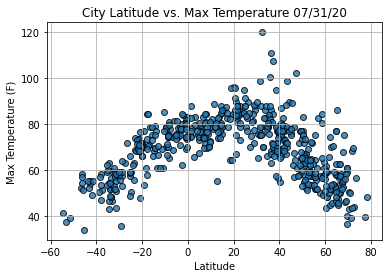

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

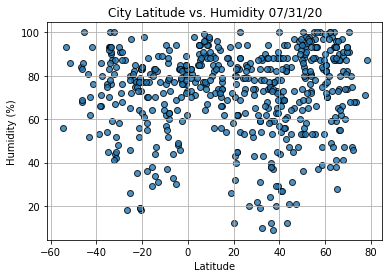

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

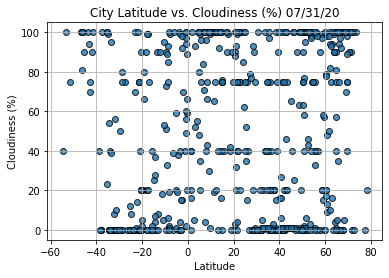

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

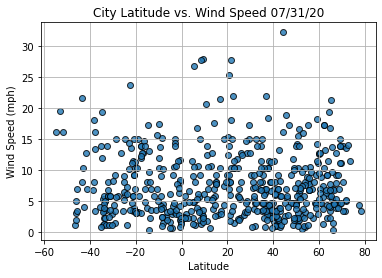

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [35]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

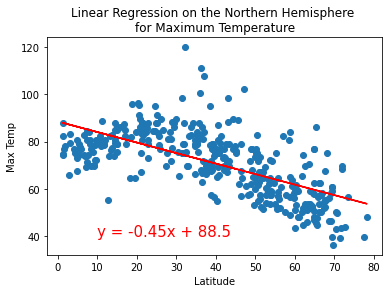

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

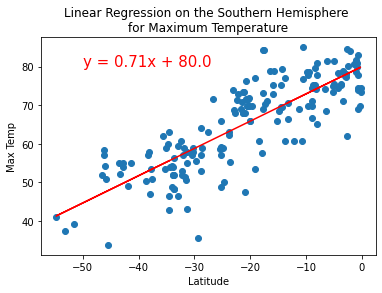

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,80))

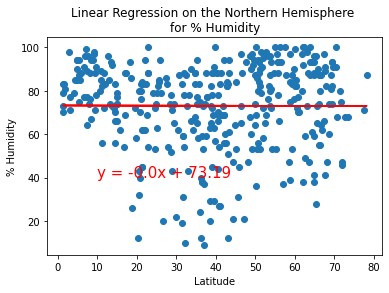

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(10,40))

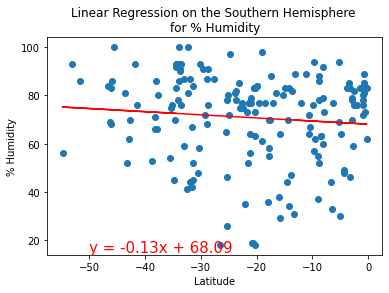

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

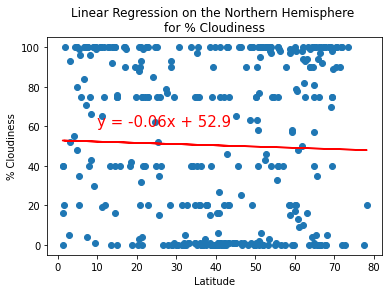

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,60))

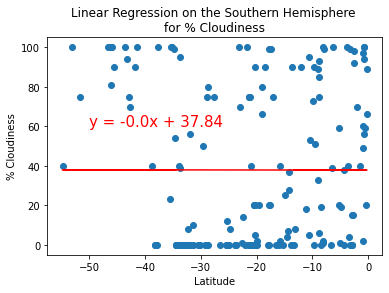

In [46]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

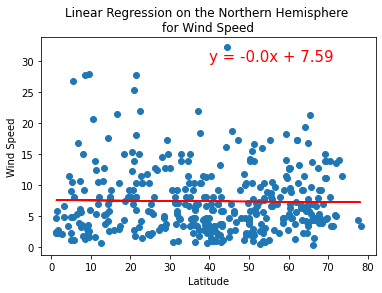

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,30))

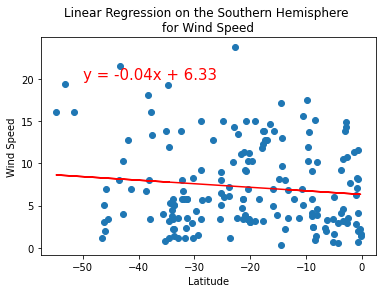

In [51]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,20))